# Tratamento de outliers

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

1. Achar a média de cada variável

2. Para cada variável, encontrar o desvio padrão 

3. Para cada variável, se determinado registro for maior ou igual a três desvios padrões + média (outlier), substituir  o valor 
   por interpolação linear dos registros adjacentes

'''

'\nO que foi feito nesta etapa:\n----------------------------\n\n1. Achar a média de cada variável\n\n2. Para cada variável, encontrar o desvio padrão \n\n3. Para cada variável, se determinado registro for maior ou igual a três desvios padrões + média (outlier), substituir  o valor \n   por interpolação linear dos registros adjacentes\n\n'

In [1]:
from google.colab import drive #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
#dados da estação de São Cristóvão
df_sc_new = pd.read_csv("gdrive/My Drive/dissertação/df_sc_new.csv",sep=",")

In [4]:
#dados da estação da Tijuca
df_sp_new=pd.read_csv("gdrive/My Drive/dissertação/df_sp_new.csv",sep=",")

In [5]:
#São Cristóvão
df_sc_new.head(1) 

,Data,Chuva_sc,Pres_sc,RS_sc,Temp_sc,UR_sc,Vel_Vento_sc,SO2_sc,NO2_sc,CO_sc,NO_sc,NOx_sc,O3_sc,PM10_sc
0,2012-10-01 15:30:00,0.0,1012.32,200.12,31.42,57.46,1.7,3.84,31.92,0.11,31.92,43.16,57.61,27.0


In [6]:
#Tijuca
df_sp_new.head(1) 

,Data,Chuva_sp,Pres_sp,RS_sp,Temp_sp,UR_sp,Vel_Vento_sp,SO2_sp,NO2_sp,CO_sp,NO_sp,NOx_sp,O3_sp,PM10_sp
0,2012-10-01 15:30:00,0.0,1011.48,473.67,33.16,40.58,0.78,3.12,31.92,0.6,31.92,43.16,49.9,27.77


In [7]:
# eliminação das variáveis com menos influentes (encontradas na etapa anterior)
df_sp_new=df_sp_new[['Data','Temp_sp','NOx_sp','CO_sp','Chuva_sp','Pres_sp','Vel_Vento_sp','SO2_sp','PM10_sp','O3_sp','UR_sp']]

In [8]:
# eliminação das variáveis com menos influentes (encontradas na etapa anterior)
df_sc_new=df_sc_new[['Data','Temp_sc','NOx_sc','CO_sc','Chuva_sc','Pres_sc','Vel_Vento_sc','SO2_sc','PM10_sc','O3_sc','UR_sc']]

In [9]:
# desvio padrão das variáveis do dataframe da Tijuca
df_sp_new.std()

Temp_sp          5.603599
NOx_sp          35.907004
CO_sp            0.252008
Chuva_sp         3.706666
Pres_sp          5.385422
Vel_Vento_sp     1.122239
SO2_sp           5.782657
PM10_sp         18.924257
O3_sp           24.830731
UR_sp           19.398027
dtype: float64

In [10]:
# média das variáveis do dataframe da Tijuca
df_sp_new.mean()

Temp_sp           24.423311
NOx_sp            57.234630
CO_sp              0.401673
Chuva_sp           0.150513
Pres_sp         1015.098704
Vel_Vento_sp       0.736632
SO2_sp             3.773778
PM10_sp           32.948537
O3_sp             28.366178
UR_sp             65.757445
dtype: float64

In [11]:
# desvio padrão das variáveis do dataframe de São Cristóvão
df_sc_new.std()

Temp_sc          4.771902
NOx_sc          35.907004
CO_sc            0.321004
Chuva_sc         0.965220
Pres_sc          4.810906
Vel_Vento_sc     0.582975
SO2_sc           9.602003
PM10_sc         21.806007
O3_sc           26.548084
UR_sc           17.142190
dtype: float64

In [12]:
# média das variáveis do dataframe de São Cristóvão
df_sc_new.mean()

Temp_sc           26.511795
NOx_sc            57.234630
CO_sc              0.241478
Chuva_sc           0.105082
Pres_sc         1014.916328
Vel_Vento_sc       0.891624
SO2_sc             7.672783
PM10_sc           34.386848
O3_sc             24.037099
UR_sc             72.125128
dtype: float64

**Tijuca**

In [13]:
# Temp_sp
def change_Temp_sp(value):
    if value>=24.423311+3*5.603599:
        value=None
    return value

# NOx_sp
def change_NOx_sp(value):
    if value>=57.234630+3*35.907004:
        value=None
    return value
        
# CO_sp
def change_CO_sp(value):
    if value>=0.401673+3*0.252008:
        value=None
    return value
        
# Chuva_sp
def change_Chuva_sp(value):
    if value>=0.150513+3*3.706666:
        value=None
    return value

# Pres_sp
def change_Pres_sp(value):
    if value>=1015.098704+3*5.385422:
        value=None
    return value
        
# Vel_Vento_sp
def change_Vel_Vento_sp(value):
    if value>=0.736632+3*1.122239:
        value=None
    return value
        
# SO2_sp
def change_SO2_sp(value):
    if value>=3.773778+3*5.782657:
        value=None
    return value

# PM10_sp
def change_PM10_sp(value):
    if value>=32.948537+3*18.924257:
        value=None
    return value
        
# O3_sp
def change_O3_sp(value):
    if value>=28.366178+3*24.830731:
        value=None
    return value
        
# UR_sp
def change_UR_sp(value):
    if value>=65.757445+3*19.398027:
        value=None
    return value

df_sp_new['Temp_sp']=df_sp_new['Temp_sp'].apply(change_Temp_sp)
df_sp_new['NOx_sp']=df_sp_new['NOx_sp'].apply(change_NOx_sp)
df_sp_new['CO_sp']=df_sp_new['CO_sp'].apply(change_CO_sp)
df_sp_new['Chuva_sp']=df_sp_new['Chuva_sp'].apply(change_Chuva_sp)
df_sp_new['Pres_sp']=df_sp_new['Pres_sp'].apply(change_Pres_sp)
df_sp_new['Vel_Vento_sp']=df_sp_new['Vel_Vento_sp'].apply(change_Vel_Vento_sp)
df_sp_new['SO2_sp']=df_sp_new['SO2_sp'].apply(change_SO2_sp)
df_sp_new['PM10_sp']=df_sp_new['PM10_sp'].apply(change_PM10_sp)
df_sp_new['O3_sp']=df_sp_new['O3_sp'].apply(change_O3_sp)
df_sp_new['UR_sp']=df_sp_new['UR_sp'].apply(change_UR_sp)

df_sp_new.interpolate(method='linear', inplace=True)

**São Cristóvão**

In [14]:
# Temp_sc
def change_Temp_sc(value):
    if value>= 26.511795+3*4.771902:
        value=None
    return value

# NOx_sc
def change_NOx_sc(value):
    if value>=57.234630+3*35.907004:
        value=None
    return value
        
# CO_sc
def change_CO_sc(value):
    if value>=0.241478+3*0.321004:
        value=None
    return value
        
# Chuva_sc
def change_Chuva_sc(value):
    if value>=0.105082+3*0.965220:
        value=None
    return value

# Pres_sc
def change_Pres_sc(value):
    if value>=1014.916328+3*4.810906:
        value=None
    return value
        
# Vel_Vento_sc
def change_Vel_Vento_sc(value):
    if value>=0.891624+3*0.582975:
        value=None
    return value
        
# SO2_sc
def change_SO2_sc(value):
    if value>=7.672783+3*9.602003:
        value=None
    return value

# PM10_sc
def change_PM10_sc(value):
    if value>=34.386848+3*21.806007:
        value=None
    return value
        
# O3_sc
def change_O3_sc(value):
    if value>=24.037099+3*26.548084:
        value=None
    return value
        
# UR_sc
def change_UR_sc(value):
    if value>=72.125128+3*17.142190:
        value=None
    return value

df_sc_new['Temp_sc']=df_sc_new['Temp_sc'].apply(change_Temp_sc)
df_sc_new['NOx_sc']=df_sc_new['NOx_sc'].apply(change_NOx_sc)
df_sc_new['CO_sc']=df_sc_new['CO_sc'].apply(change_CO_sc)
df_sc_new['Chuva_sc']=df_sc_new['Chuva_sc'].apply(change_Chuva_sc)
df_sc_new['Pres_sc']=df_sc_new['Pres_sc'].apply(change_Pres_sc)
df_sc_new['Vel_Vento_sc']=df_sc_new['Vel_Vento_sc'].apply(change_Vel_Vento_sc)
df_sc_new['SO2_sc']=df_sc_new['SO2_sc'].apply(change_SO2_sc)
df_sc_new['PM10_sc']=df_sc_new['PM10_sc'].apply(change_PM10_sc)
df_sc_new['O3_sc']=df_sc_new['O3_sc'].apply(change_O3_sc)
df_sc_new['UR_sc']=df_sc_new['UR_sc'].apply(change_UR_sc)

df_sc_new.interpolate(method='linear', inplace=True)

# Agrupamento dos dados por dia + padronização

In [15]:
'''
O que foi feito nesta etapa:
----------------------------

Conforme a ideia encontrada no artigo deste ano:
https://www.researchgate.net/publication/347444018_A_Novel_Deep_Learning_Approach_to_Predict_Air_Quality_Index

Os dados, que inicialmente são horários, foram agrupados por dia (máxima diária), isto aumenta o range de previsão do modelo

'''

'\nO que foi feito nesta etapa:\n----------------------------\n\nConforme a ideia encontrada no artigo deste ano:\nhttps://www.researchgate.net/publication/347444018_A_Novel_Deep_Learning_Approach_to_Predict_Air_Quality_Index\n\nOs dados, que inicialmente são horários, foram agrupados por dia (máxima diária), isto aumenta o range de previsão do modelo\n\n'

**Tijuca**

In [16]:
df_sp_new.reset_index(inplace=True)

df_sp_new['data_resolved']=df_sp_new['Data'].apply(lambda x: str(x)[:10])

df_sp_new = df_sp_new[['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp', 'data_resolved']]

df_sp_new = df_sp_new.groupby(['data_resolved'], sort=False)['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp'].max()

Foi escolhida normalização ao invés de padronização, pois as distribuições das variáveis não são normais

In [17]:
names = df_sp_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_sp_new)

df_sp_new_scaled = pd.DataFrame(data_scaled, columns=names)

df_sp_new_scaled.index=df_sp_new.index

**São Cristóvão**

In [18]:
df_sc_new.reset_index(inplace=True)

df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_sc_new)

df_sc_new_scaled = pd.DataFrame(data_scaled, columns=names)

df_sc_new_scaled.index=df_sc_new.index

# geração do modelo RNN

In [19]:
import time
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, RNN, GRU,SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed

In [20]:
# from tensorflow.keras.layers import RNN

In [21]:
values = df_sc_new_scaled.values
values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

In [22]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    
# model = Sequential()                
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(LSTM(250,return_sequences=True)) #aqui entra a fórmula
# model.add(TimeDistributed(Dense(10)))
# model.compile(loss='mse', optimizer=opt)

In [23]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(SimpleRNN(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(SimpleRNN(26,return_sequences=True))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1, 70)             9870      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 1, 26)             962       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             270       
Total params: 11,812
Trainable params: 11,812
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 2s - loss: 0.4694 - val_loss: 0.2842
Epoch 2/5
5/5 - 0s - loss: 0.2323 - val_loss: 0.1591
Epoch 3/5
5/5 - 0s - loss: 0.1385 - val_loss: 0.1219
Epoch 4/5
5/5 - 0s - loss: 0.1061 - val_loss: 0.1102
Epoch 5/5
5/5 - 0s - loss: 0.0926 - val_loss: 0.1020

Model Runtime: 3.31 seconds


In [26]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [27]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,31.830589,87.231163,0.893035,-0.68991,1014.427673,2.103203,28.857412,59.668846,73.382927,88.693665


In [28]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


Obs: somente foi implementado o modelo, não houveram alterações

In [29]:
#https://www.kaggle.com/charel/learn-by-example-rnn-lstm-gru-time-series
#https://www.kaggle.com/nvhbk16k53/simple-rnn-with-keras
#https://towardsdatascience.com/a-comprehensive-guide-to-working-with-recurrent-neural-networks-in-keras-f3b2d5e2fa7f

### Cálculo do RMSE

Temp_sc

In [30]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8.993


NOx_sc

In [31]:
rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 41.439


CO_sc

In [32]:
rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.359


Chuva_sc

In [33]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.238


Pres_sc

In [34]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.061


Vel_Vento_sc

In [35]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.511


SO2_sc

In [36]:
rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 16.136


PM10_sc

In [37]:
rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 24.346


O3_sc

In [38]:
rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 27.233


UR_sc

In [39]:
rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 12.493


### Cálculo do MAE 

Temp_sc

In [40]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 7.287


NOx_sc

In [41]:
mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 33.412


CO_sc

In [42]:
mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 0.297


Chuva_sc

In [43]:
mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 0.901


Pres_sc

In [44]:
mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 4.122


Vel_Vento_sc

In [45]:
mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 0.408


SO2_sc

In [46]:
mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 13.381


PM10_sc

In [47]:
mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 20.089


O3_sc

In [48]:
mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 22.748


UR_sc

In [49]:
mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 10.089


### Cálculo do R2

Temp_sc

In [50]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test R2: %.3f' % r2)

Test R2: -1.652


NOx_sc

In [51]:
r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test R2: %.3f' % r2)

Test R2: -0.372


CO_sc

In [52]:
r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test R2: %.3f' % r2)

Test R2: -1.537


Chuva_sc

In [53]:
r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test R2: %.3f' % r2)

Test R2: -2.360


Pres_sc

In [54]:
r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test R2: %.3f' % r2)

Test R2: -2.360


Vel_Vento_sc

In [55]:
r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test R2: %.3f' % r2)

Test R2: -7.063


SO2_sc

In [56]:
r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test R2: %.3f' % r2)

Test R2: -8.597


PM10_sc

In [57]:
r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test R2: %.3f' % r2)

Test R2: -5.058


O3_sc

In [58]:
r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test R2: %.3f' % r2)

Test R2: -3.745


UR_sc

In [59]:
r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test R2: %.3f' % r2)

Test R2: -0.769


**história do treinamento**

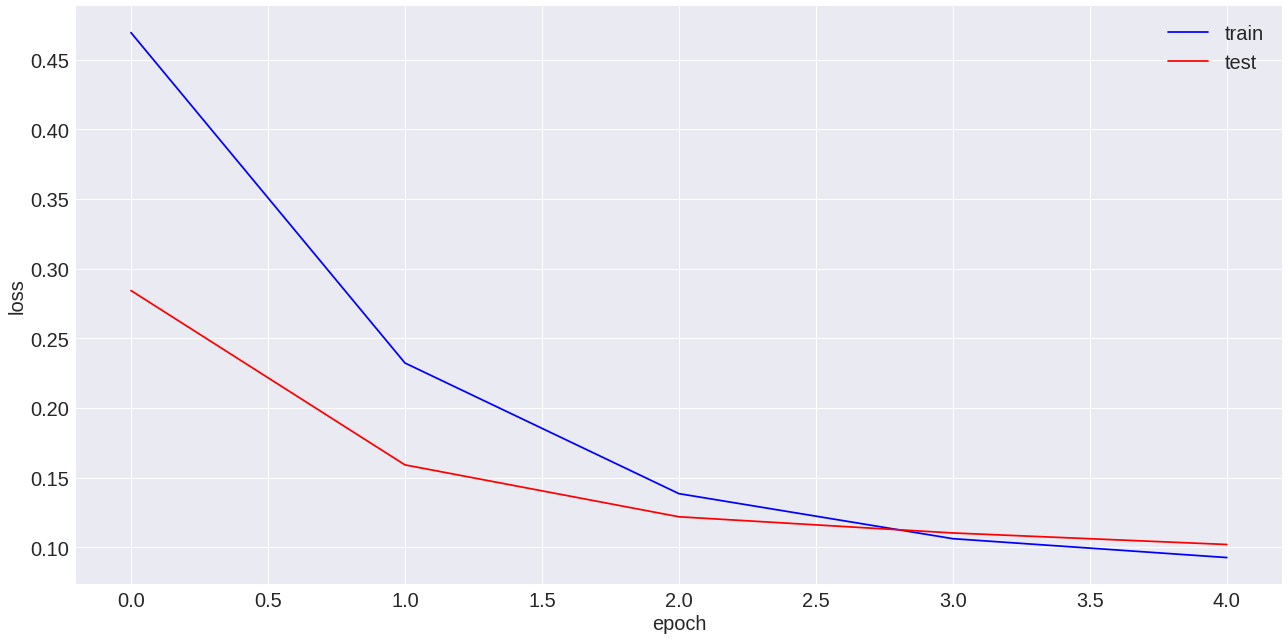

In [60]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# validação cruzada- método 1- block cross validation

In [61]:
from IPython.display import Image
# Image("img/picture.png")

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Conforme a teoria encontrada no artigo abaixo:
https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

Foram experimentadas dois métodos de validação cruzada com série temporal

aqui usei k=5 e coloquei somente a primeira quinta parte do treinamento como exemplo, utilizando os dados do dataframe
correspondente a estação de São Cristóvão

'''

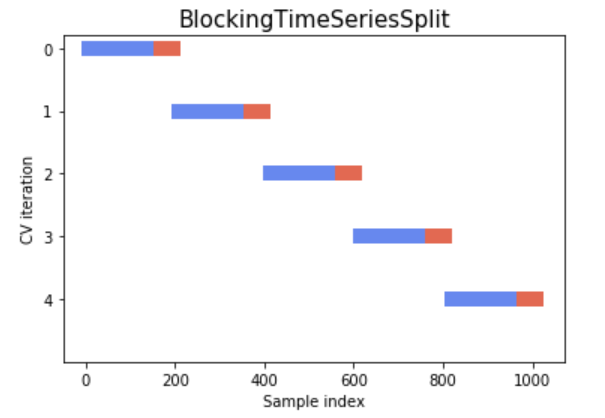

In [62]:
Image("gdrive/My Drive/dissertação/block.png")

**divisão dos folds (k=5)**

In [63]:
df_sp_new=pd.read_csv("gdrive/My Drive/dissertação/df_sp_new.csv",sep=",")
df_sc_new=pd.read_csv("gdrive/My Drive/dissertação/df_sc_new.csv",sep=",")

In [64]:
import time
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed

# df_sc_new=pd.read_csv('df_sc_new.csv')
# df_sp_new=pd.read_csv('df_sp_new.csv')
# df_sp_new.reset_index(inplace=True)

df_sp_new['data_resolved']=df_sp_new['Data'].apply(lambda x: str(x)[:10])
df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sp_new.reset_index(inplace=True)

df_sp_new = df_sp_new[['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp', 'data_resolved']]

df_sp_new = df_sp_new.groupby(['data_resolved'], sort=False)['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp'].max()

names = df_sp_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sp = scaler.fit_transform(df_sp_new)

df_sp_new_scaled = pd.DataFrame(data_scaled_sp, columns=names)

df_sp_new_scaled.index=df_sp_new.index

df_sc_new.reset_index(inplace=True)

# df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sc = scaler.fit_transform(df_sc_new)
df_sc_new_scaled = pd.DataFrame(data_scaled_sc, columns=names)
df_sc_new_scaled.index=df_sc_new.index

values = df_sc_new_scaled.values
values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

**treinamento do modelo para o primeiro 1/5 da divisão**

In [65]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)
reframed = reframed[:634]

In [66]:
# split into train and test sets
values = reframed.values
n_train_days = 127

In [67]:
train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
model.add(LSTM(250,return_sequences=True))
model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
1/1 - 5s - loss: 0.1759 - val_loss: 0.1518
Epoch 2/5
1/1 - 0s - loss: 0.1741 - val_loss: 0.1502
Epoch 3/5
1/1 - 0s - loss: 0.1723 - val_loss: 0.1485
Epoch 4/5
1/1 - 0s - loss: 0.1704 - val_loss: 0.1467
Epoch 5/5
1/1 - 0s - loss: 0.1684 - val_loss: 0.1448

Model Runtime: 4.99 seconds


**resultados do treinamento**

In [68]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [69]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 15.000
Test NOx_sc RMSE: 89.629
Test CO_sc RMSE: 1.201
Test Chuva_sc RMSE: 4.020
Test Pres_sc RMSE: 13.157
Test Vel_Vento_sc RMSE: 1.504
Test SO2_sc RMSE: 33.159
Test PM10_sc RMSE: 72.639
Test O3_sc RMSE: 46.062
Test UR_sc RMSE: 33.113


In [70]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 14.145
Test NOx_sc MAE: 65.605
Test CO_sc MAE: 0.934
Test Chuva_sc MAE: 1.836
Test Pres_sc MAE: 12.443
Test Vel_Vento_sc MAE: 1.363
Test SO2_sc MAE: 26.198
Test PM10_sc MAE: 65.425
Test O3_sc MAE: 38.754
Test UR_sc MAE: 31.979


In [71]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -263248.731
Test NOx_sc R2: -9648.349
Test CO_sc R2: -86075.245
Test Pres_sc R2: -73506.937
Test Pres_sc R2: -73506.937
Test Vel_Vento_sc R2: -95737.829
Test SO2_sc R2: -8325.534
Test PM10_sc R2: -65899.151
Test O3_sc R2: -6842.561
Test UR_sc R2: -142851.475


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 ]),
 <a list of 9 Text major ticklabel objects>)

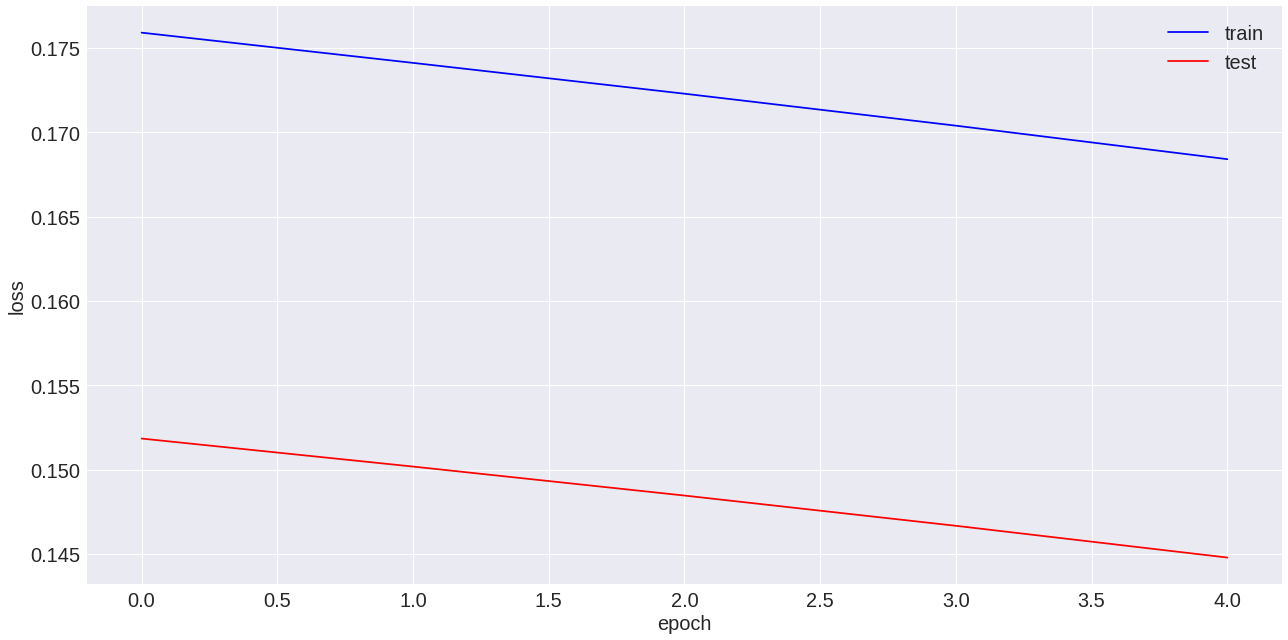

In [72]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# validação cruzada- método 2- split cross validation

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Conforme a teoria encontrada no artigo abaixo:
https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

Foram experimentadas dois métodos de validação cruzada com série temporal

aqui usei k=5 e coloquei somente a primeira quinta parte do treinamento como exemplo, utilizando os dados do dataframe
correspondente a estação de São Cristóvão

'''

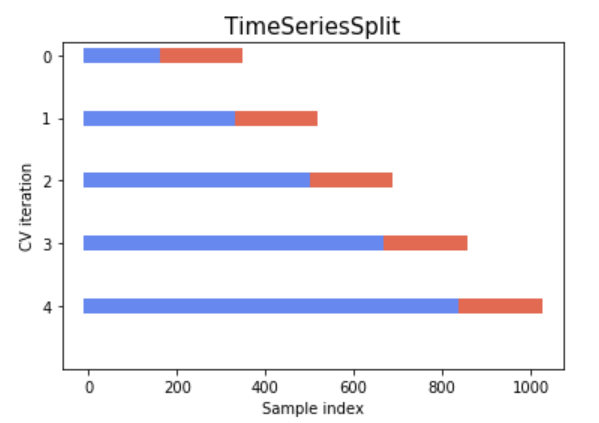

In [73]:
Image("gdrive/My Drive/dissertação/split.png")

In [74]:
df_sp_new=pd.read_csv("gdrive/My Drive/dissertação/df_sp_new.csv",sep=",")
df_sc_new=pd.read_csv("gdrive/My Drive/dissertação/df_sc_new.csv",sep=",")

**divisão dos fold (k=5) e treinamento para o primeiro 1/5**

In [76]:
import pandas as pd
import warnings
import time
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed
warnings.filterwarnings("ignore")

# df_sc_new=pd.read_csv('df_sc_new.csv')
# df_sp_new=pd.read_csv('df_sp_new.csv')

df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new.reset_index(inplace=True)

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sc = scaler.fit_transform(df_sc_new)

df_sc_new_scaled = pd.DataFrame(data_scaled_sc, columns=names)

df_sc_new_scaled.index=df_sc_new.index
values = df_sc_new_scaled.values

values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

#split 1: 528 + 528

reframed = reframed[:1056]

# split into train and test sets
values = reframed.values
n_train_days = 528

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
model.add(LSTM(250,return_sequences=True))
model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
2/2 - 5s - loss: 0.1627 - val_loss: 0.1307
Epoch 2/5
2/2 - 0s - loss: 0.1604 - val_loss: 0.1288
Epoch 3/5
2/2 - 0s - loss: 0.1582 - val_loss: 0.1268
Epoch 4/5
2/2 - 0s - loss: 0.1557 - val_loss: 0.1246
Epoch 5/5
2/2 - 0s - loss: 0.1530 - val_loss: 0.1221

Model Runtime: 5.55 seconds


**resultados do treinamento**

In [77]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [78]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 12.059
Test NOx_sc RMSE: 111.346
Test CO_sc RMSE: 0.985
Test Chuva_sc RMSE: 2.961
Test Pres_sc RMSE: 14.908
Test Vel_Vento_sc RMSE: 1.601
Test SO2_sc RMSE: 20.330
Test PM10_sc RMSE: 78.736
Test O3_sc RMSE: 64.720
Test UR_sc RMSE: 25.764


In [79]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 11.156
Test NOx_sc MAE: 95.415
Test CO_sc MAE: 0.729
Test Chuva_sc MAE: 0.990
Test Pres_sc MAE: 14.220
Test Vel_Vento_sc MAE: 1.431
Test SO2_sc MAE: 14.736
Test PM10_sc MAE: 71.833
Test O3_sc MAE: 57.561
Test UR_sc MAE: 24.714


In [80]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -33937.512
Test NOx_sc R2: -18284.306
Test CO_sc R2: -3965.937
Test Pres_sc R2: -143180.191
Test Pres_sc R2: -143180.191
Test Vel_Vento_sc R2: -710690.510
Test SO2_sc R2: -1635.202
Test PM10_sc R2: -11385.393
Test O3_sc R2: -34194.017
Test UR_sc R2: -78670.125


**histórico do treinamento**

In [81]:
InteractiveShell.ast_node_interactivity = "last_expr"

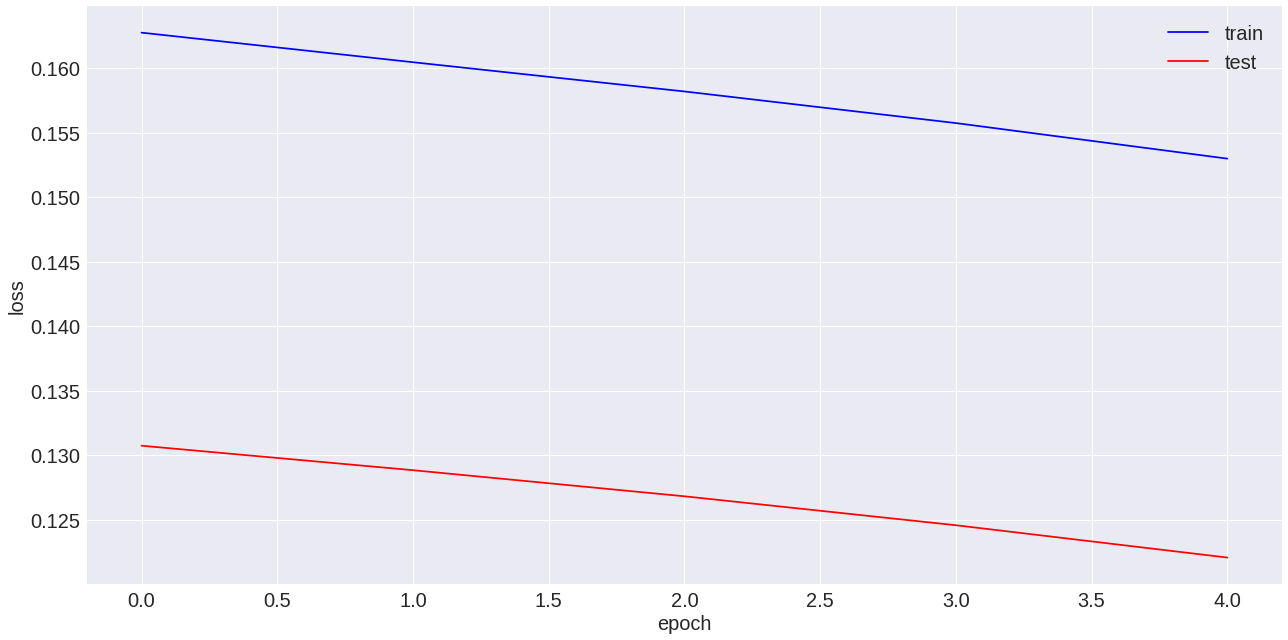

In [82]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# links sobre hiperparâmetros de redes neurais recorrentes LSTM

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Nesta etapa, com intuito de conseguir o melhor modelo, pesquisei sobre os hiperparâmetros que compõem as redes LSTM.
Abaixo seguem os links que salvei da pesquisa

'''

**-ativação (x)**
https://keras.io/api/layers/activations/
https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
https://medium.com/@snaily16/what-why-and-which-activation-functions-b2bf748c0441
http://kth.diva-portal.org/smash/get/diva2:1465073/FULLTEXT01.pdf

**-diferença entre ativação e recurrent_activation (x)**:
https://stackoverflow.com/questions/44947842/can-someone-explain-to-me-the-difference-between-activation-and-recurrent-activa

**-significado dos layers:(x)**
https://stackoverflow.com/questions/57414387/meaning-of-tf-keras-layers-lstm-parameters
https://machinelearningmastery.com/use-dropout-lstm-networks-time-series-forecasting/

**-kernel initializer:(x)**
https://keras.io/api/layers/initializers/
https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78
https://wandb.ai/sayakpaul/weight-initialization-tb/reports/Effects-of-Weight-Initialization-on-Neural-Networks--Vmlldzo2ODY0NA

**-recurrent initializer:(x)**
https://stackoverflow.com/questions/63630659/what-does-recurrent-initializer-do
https://notebook.community/infilect/ml-course1/deep-learning-keras/keras-notebooks/RNN/7.1%20RNN%20and%20LSTM
https://stackoverflow.com/questions/64881855/kernel-and-recurrent-kernel-in-keras-lstms

**-bias initializer:(x)**
https://www.tutorialexample.com/understand-lstm-weight-and-bias-initialization-when-initializer-is-none-in-tensorflow-tensorflow-tutorial/
https://medium.com/@glenmeyerowitz/bias-initialization-in-a-neural-network-2e5d26fed0f0
https://cs231n.github.io/neural-networks-2/


**-kernel regularizer:(x)**
https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/ https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

**-bias regularizer:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

**-activity regularizer:(x)**
https://machinelearningmastery.com/how-to-reduce-generalization-error-in-deep-neural-networks-with-activity-regularization-in-keras/

**-kernel constraint:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/

**-dropout:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

**-recurrent dropout:(x)**
https://stackoverflow.com/questions/44924690/keras-the-difference-between-lstm-dropout-and-lstm-recurrent-dropout

**-return sequences/states:(x)**
https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/
https://www.dlology.com/blog/how-to-use-return_state-or-return_sequences-in-keras/

**-go backwards:(x)**
https://stackoverflow.com/questions/49946942/keras-lstm-go-backwards-usage

**-stateful:(x)**
https://machinelearningmastery.com/stateful-stateless-lstm-time-series-forecasting-python/
https://stackoverflow.com/questions/39681046/keras-stateful-vs-stateless-lstms

**-time_major:(x)**
https://stackoverflow.com/questions/42130491/batch-major-vs-time-major-lstm

**-unroll:(x)**
https://machinelearningmastery.com/rnn-unrolling/
https://stats.stackexchange.com/questions/492040/what-is-unrolling-in-lstm